In [3]:
import sys
sys.path.append('d:/lee-lab-research/sa-scnn/')
sys.path.append('/Users/isaaclin/Desktop/lee-lab-research/sa-scnn')
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary
from torch.utils.data import Dataset,DataLoader
from modeling.sascnn import *
from modeling.scnn import *
from utils import *


In [2]:
with open("sascnn-corrs.txt", "r+") as file1:
    x = file1.read().split("\n")
    print(x)
    x = [a[1:-1] for a in x if a!='']
    print(x)
    x = [a.split(", ") for a in x]
    print(x)
    for i in range(len(x)):
        for j in range(len(x[0])):
            x[i][j]=float(x[i][j])
    print(x)
    print(len(x))



['[0.20361047555557113, 0.23854427247284157, 0.5056183884909426, 0.26252054093200095, 0.3496307282990583, 0.7454628220647308, 0.4036085394668736, 0.3022291965646694, 0.26084204410703976, 0.41213543736963354]', '', '[0.35240157172749687, 0.3149946286630959, 0.4895244326445879, 0.32917412321099965, 0.39837942632229384, 0.7673413951008718, 0.4696606597724712, 0.33347989313596677, 0.31984870011702377, 0.4616919071202818]', '', '[0.29849735476083256, 0.2924121166438406, 0.5257457269533997, 0.37669371119927847, 0.30683200873350436, 0.7917855700435998, 0.4781022872291823, 0.37159669052069944, 0.3090277618105711, 0.48565908612388786]', '', '[0.3875123270043422, 0.31610362535434633, 0.5221628894106504, 0.3402429675462854, 0.40825400228060016, 0.8028583574098361, 0.4815743827623413, 0.40634858646625804, 0.3365744508421273, 0.5099380314383306]', '', '[0.34934863969069296, 0.2975285961597954, 0.5369524034301733, 0.33641737795255033, 0.4414309117210504, 0.8045208910463436, 0.4986459877642052, 0.368

In [3]:
x = np.array(x)
for neuron in range(len(x[0])):
    print("Neuron " + str(neuron) + " max:", max([a[neuron] for a in x]))

Neuron 0 max: 0.389220936055179
Neuron 1 max: 0.3532301627639883
Neuron 2 max: 0.6622578003740446
Neuron 3 max: 0.4054079317569423
Neuron 4 max: 0.4670591311974799
Neuron 5 max: 0.8590029840622317
Neuron 6 max: 0.5676248423164806
Neuron 7 max: 0.48590288925993225
Neuron 8 max: 0.45579247351979596
Neuron 9 max: 0.5462185790480505


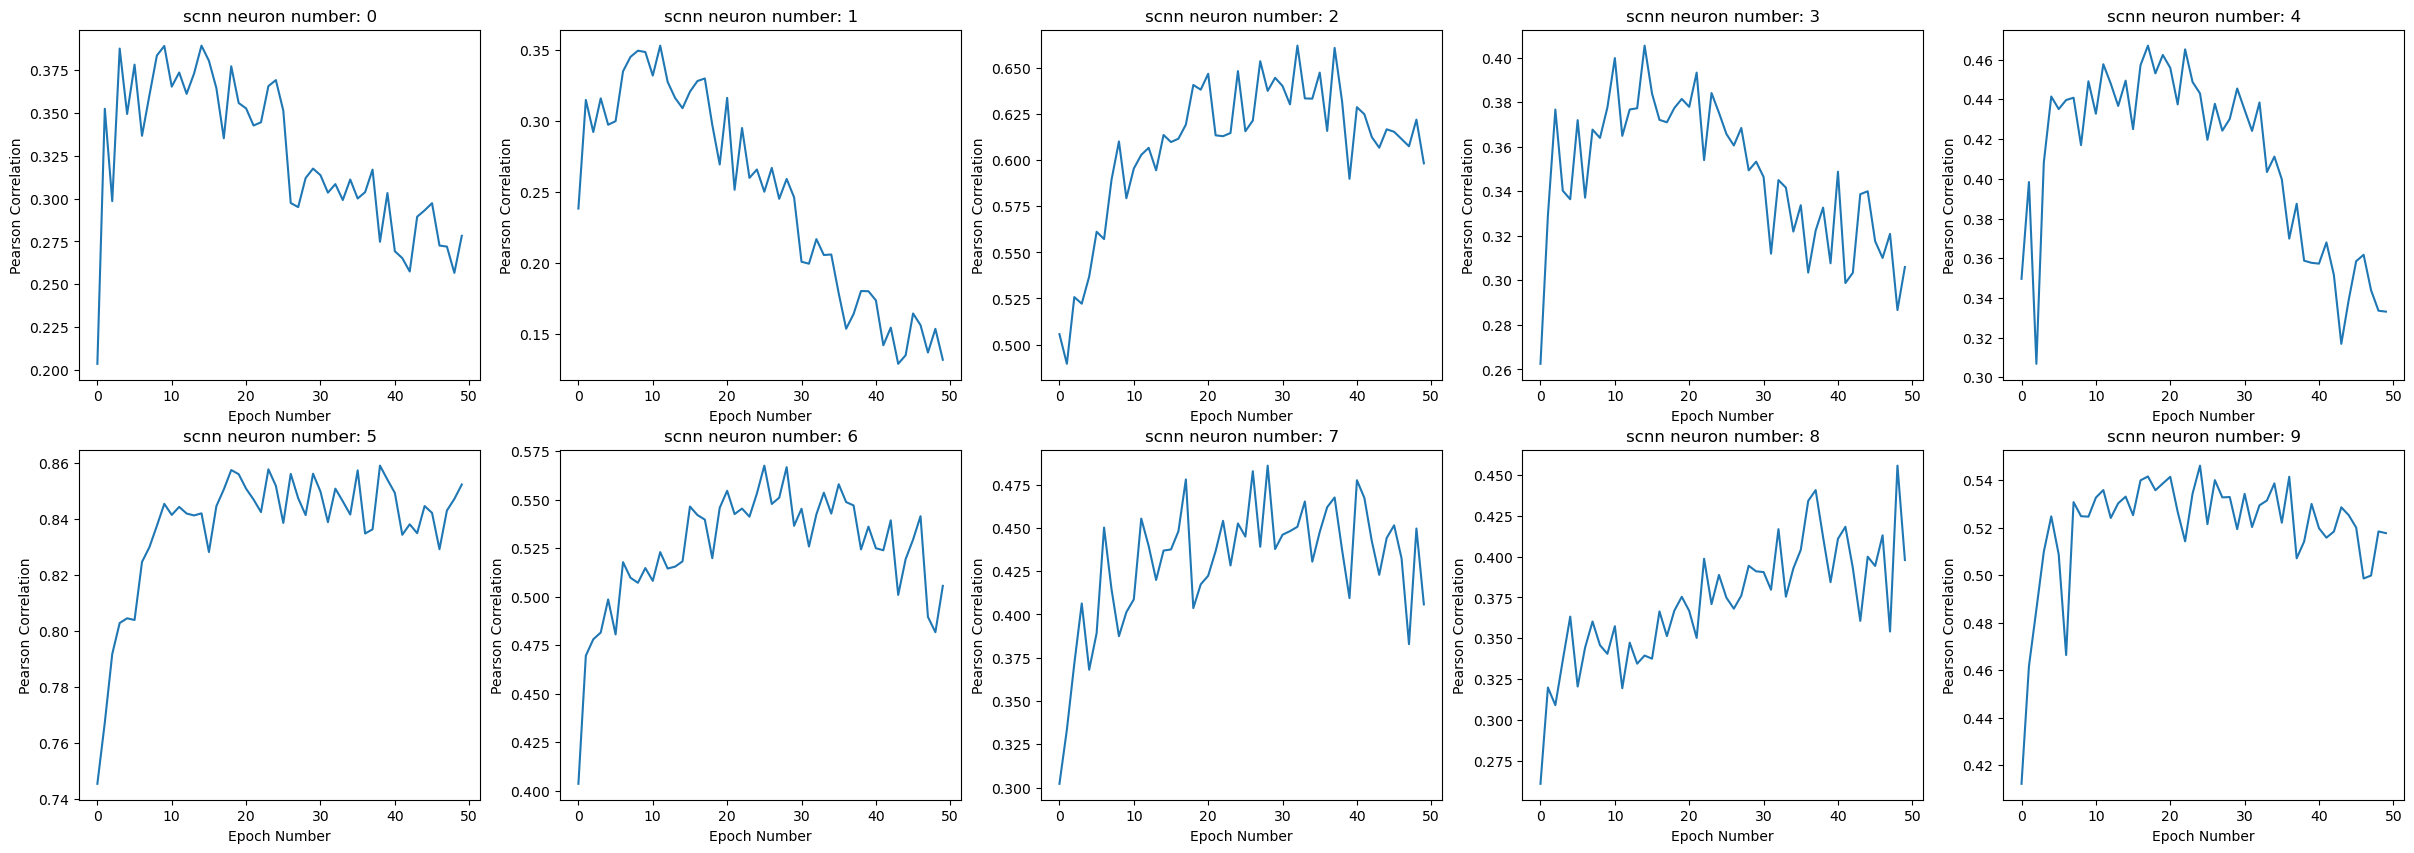

In [4]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

for neuron in range(len(x[0])):
    axis[neuron//5,neuron%5].plot([a[neuron] for a in x])
    axis[neuron//5,neuron%5].set_title("scnn neuron number: " + str(neuron))
    axis[neuron//5,neuron%5].set_xlabel("Epoch Number")
    axis[neuron//5,neuron%5].set_ylabel("Pearson Correlation")

plt.show()


In [5]:
vimg = np.load('../../all_sites_data_prepared/pics_data/val_img_m1s1.npy')
vresp = np.load('../../all_sites_data_prepared/New_response_data/valRsp_m1s1.npy')
vimg = np.reshape(vimg,(1000,1,50,50))

num_neurons = 10
net = seperate_core_model_transformer(num_neurons=num_neurons)


In [6]:
real_resp = [t[0:num_neurons] for t in vresp]
real_resp = np.transpose(real_resp)
print(real_resp)
print(real_resp.shape)

[[ 0.03372375  0.13445296  0.09795013 ...  0.10063414  0.02639104
   0.10721912]
 [ 0.06785407  0.07767575  0.04228986 ...  0.06643111  0.01459051
   0.04695644]
 [ 0.24956407  0.17101933  0.03137197 ...  0.05545014  0.01936113
   0.13747895]
 ...
 [ 0.08291471  0.06561246  0.05778953 ...  0.12678749  0.07201091
   0.07061867]
 [ 0.0666248   0.07753715  0.04632116 ...  0.07354448 -0.01999444
   0.05002205]
 [ 0.14333563  0.05757977  0.15553864 ...  0.07389365  0.04396545
   0.06996645]]
(10, 1000)


In [7]:
real_resp_ordered = []
for neuron in real_resp:
    temp = []
    for i,r in enumerate(neuron):
        temp.append((i,r))
    real_resp_ordered.append(temp)

real_resp_ordered = [sorted(x,key=lambda x:x[1],reverse=True) for x in real_resp_ordered]
print(real_resp_ordered)

[[(781, 0.6799184348185099), (125, 0.5580656431499358), (268, 0.47502969033102216), (694, 0.35491868868057097), (919, 0.302195758743722), (440, 0.26304600124330124), (22, 0.2626179530985302), (378, 0.23285808422864043), (530, 0.22604912963285845), (520, 0.18224877158291256), (406, 0.1765176641417154), (375, 0.1684282423603055), (759, 0.16031249894179986), (522, 0.15994214086920228), (822, 0.15794372227350878), (793, 0.15715217611160365), (108, 0.1495653200804194), (470, 0.147405347359606), (227, 0.14323014626405534), (287, 0.14027660898196476), (795, 0.1393893138440528), (90, 0.13897213159812458), (561, 0.1376205274747794), (1, 0.13445296265009138), (883, 0.13407330745802162), (911, 0.1311243617780178), (864, 0.12741308857699157), (265, 0.12704775080285552), (555, 0.12630486741998506), (468, 0.12585410091403323), (122, 0.12550347099971887), (417, 0.12534477945105824), (20, 0.12418156102614261), (408, 0.12215897650161336), (792, 0.1220747254085937), (880, 0.12121792507902315), (411, 0.1

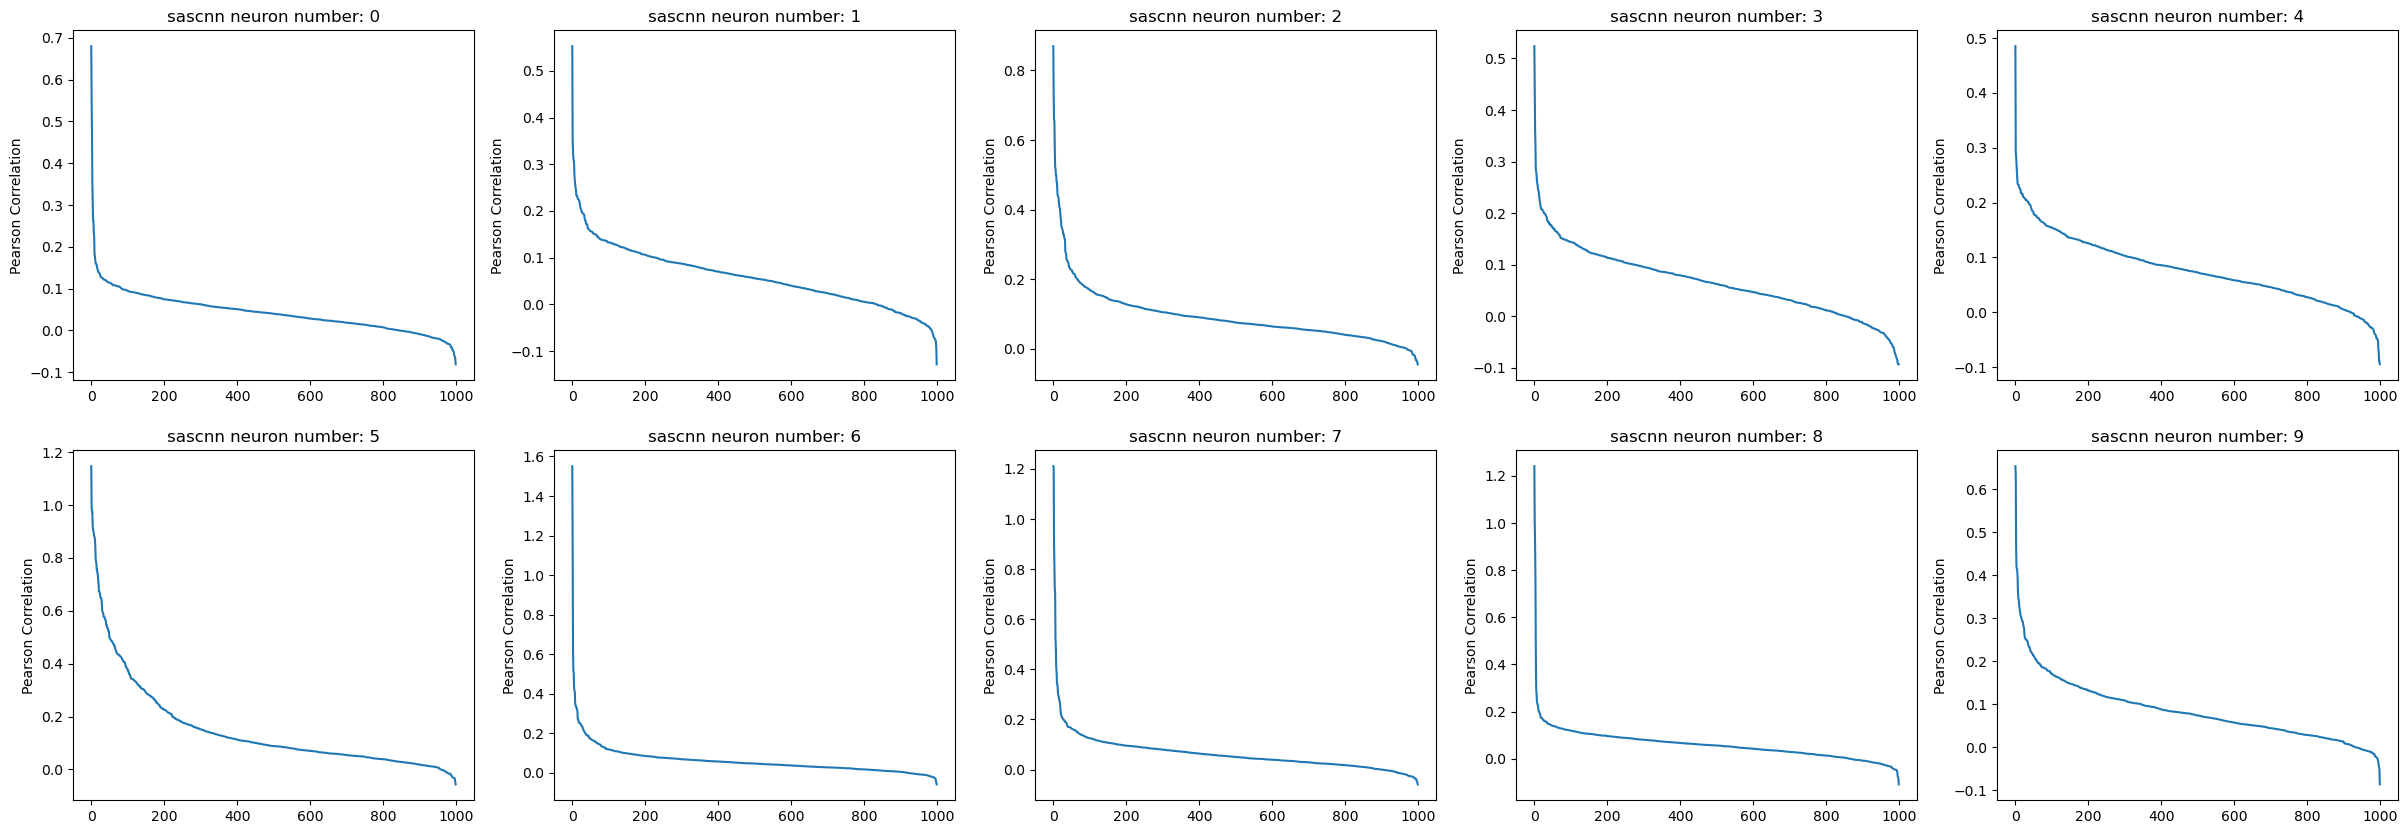

In [8]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

for neuron_num,neuron in enumerate(real_resp_ordered):
    axis[neuron_num//5,neuron_num%5].plot([i for i in range(len(neuron))],[x[1] for x in neuron])
    axis[neuron_num//5,neuron_num%5].set_title("sascnn neuron number: " + str(neuron_num))
    axis[neuron_num//5,neuron_num%5].set_ylabel("Pearson Correlation")

plt.show()

In [10]:
net.load_state_dict(torch.load("../results/sascnn-7/model.pth"))
net_resp = torch.from_numpy(np.float32(vimg))
with torch.no_grad():
        net.eval()
        net_resp = net(net_resp).detach().numpy()
net_resp = np.transpose(net_resp)

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [11]:
print(net_resp.shape)
net_resp

(10, 1000)


array([[0.06486382, 0.07469772, 0.06177552, ..., 0.06229239, 0.01929383,
        0.07391074],
       [0.11191816, 0.11466835, 0.07028349, ..., 0.05894507, 0.03308979,
        0.09921684],
       [0.2904658 , 0.17476878, 0.08342446, ..., 0.07109185, 0.03544292,
        0.09967013],
       ...,
       [0.05635971, 0.13149706, 0.06897324, ..., 0.10301914, 0.0540348 ,
        0.08967903],
       [0.10515435, 0.12947711, 0.06805615, ..., 0.06662243, 0.04544631,
        0.0799067 ],
       [0.02235921, 0.10331054, 0.10711241, ..., 0.03081927, 0.03779778,
        0.02274428]], dtype=float32)

In [12]:
net_resp_ordered = []
for i in range(len(net_resp)):
    temp = []
    ord= [x[0] for x in real_resp_ordered[i]]
    for j in ord:
        temp.append(net_resp[i][j])
    net_resp_ordered.append(temp)
net_resp_ordered = np.asarray(net_resp_ordered)
net_resp_ordered.shape

(10, 1000)

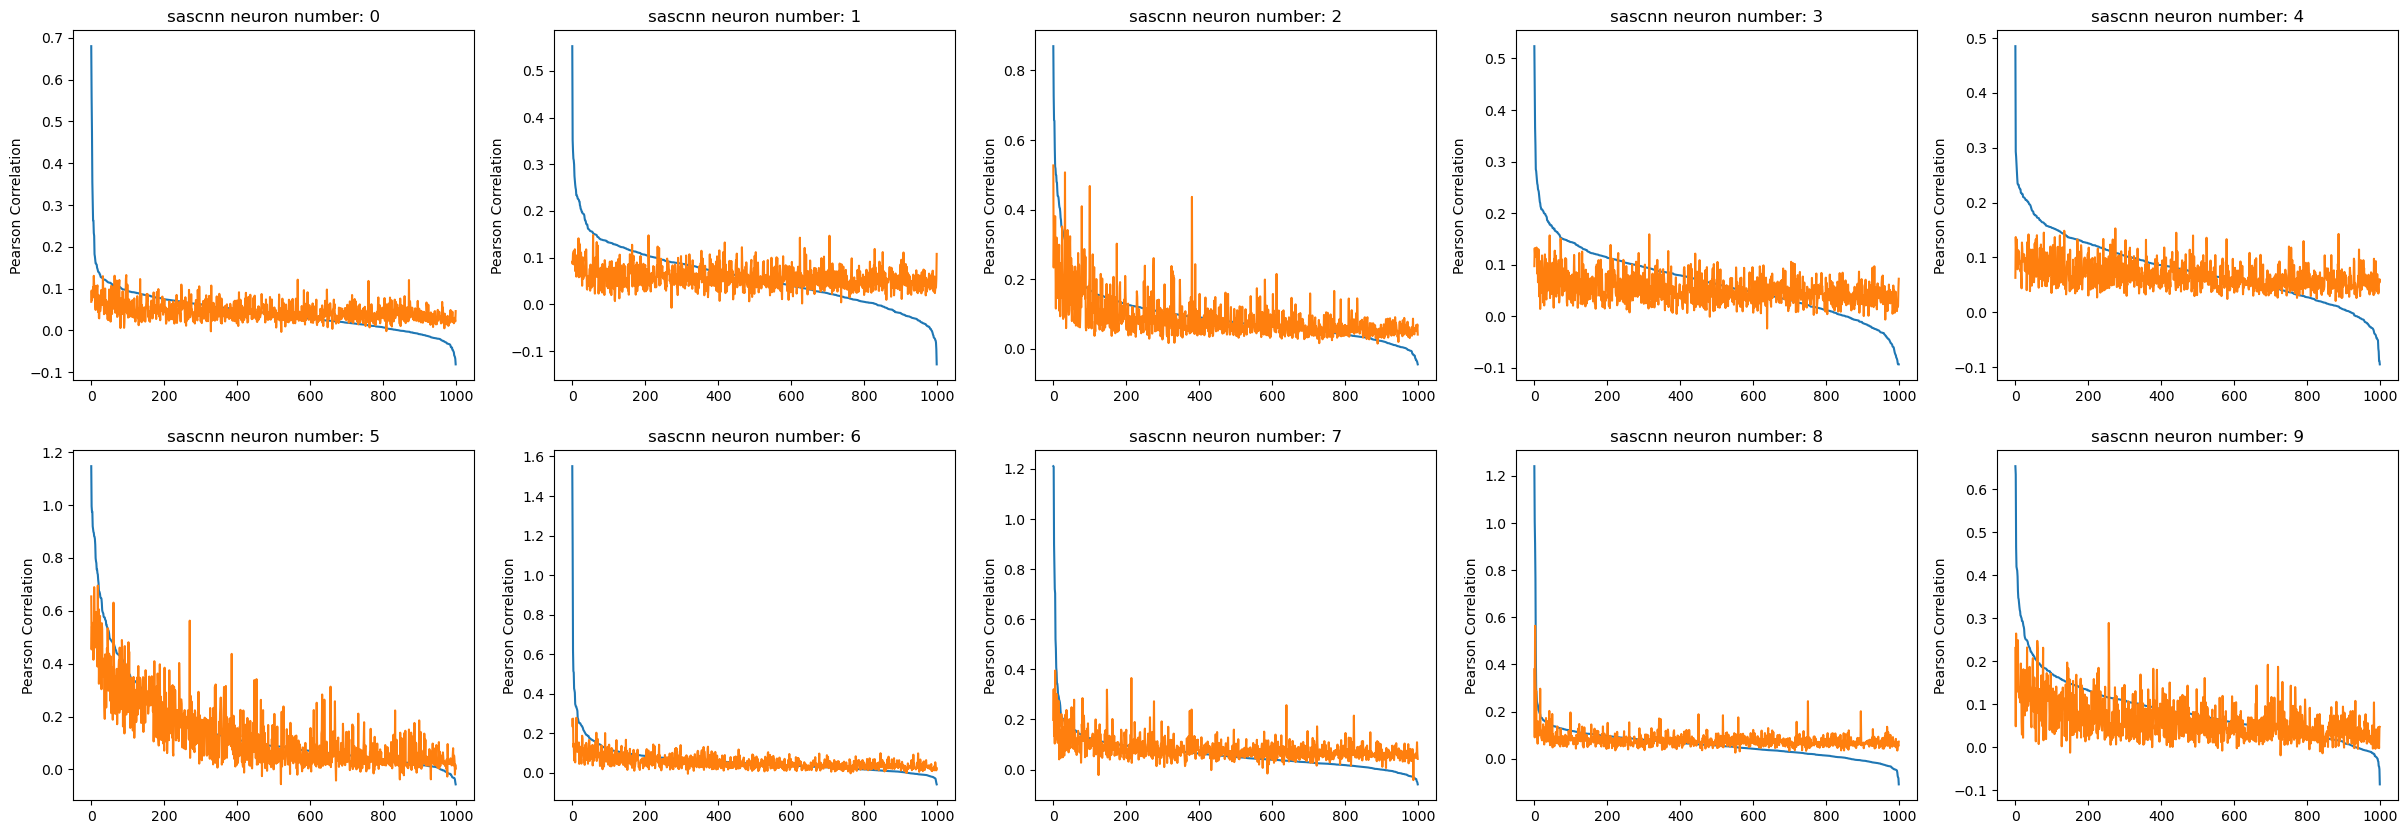

In [13]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

for neuron_num in range(len(real_resp_ordered)):
    axis[neuron_num//5,neuron_num%5].plot([i for i in range(len(neuron))],[x[1] for x in real_resp_ordered[neuron_num]])
    axis[neuron_num//5,neuron_num%5].plot([i for i in range(len(neuron))],[x for x in net_resp_ordered[neuron_num]])
    axis[neuron_num//5,neuron_num%5].set_title("sascnn neuron number: " + str(neuron_num))
    axis[neuron_num//5,neuron_num%5].set_ylabel("Pearson Correlation")

plt.show()

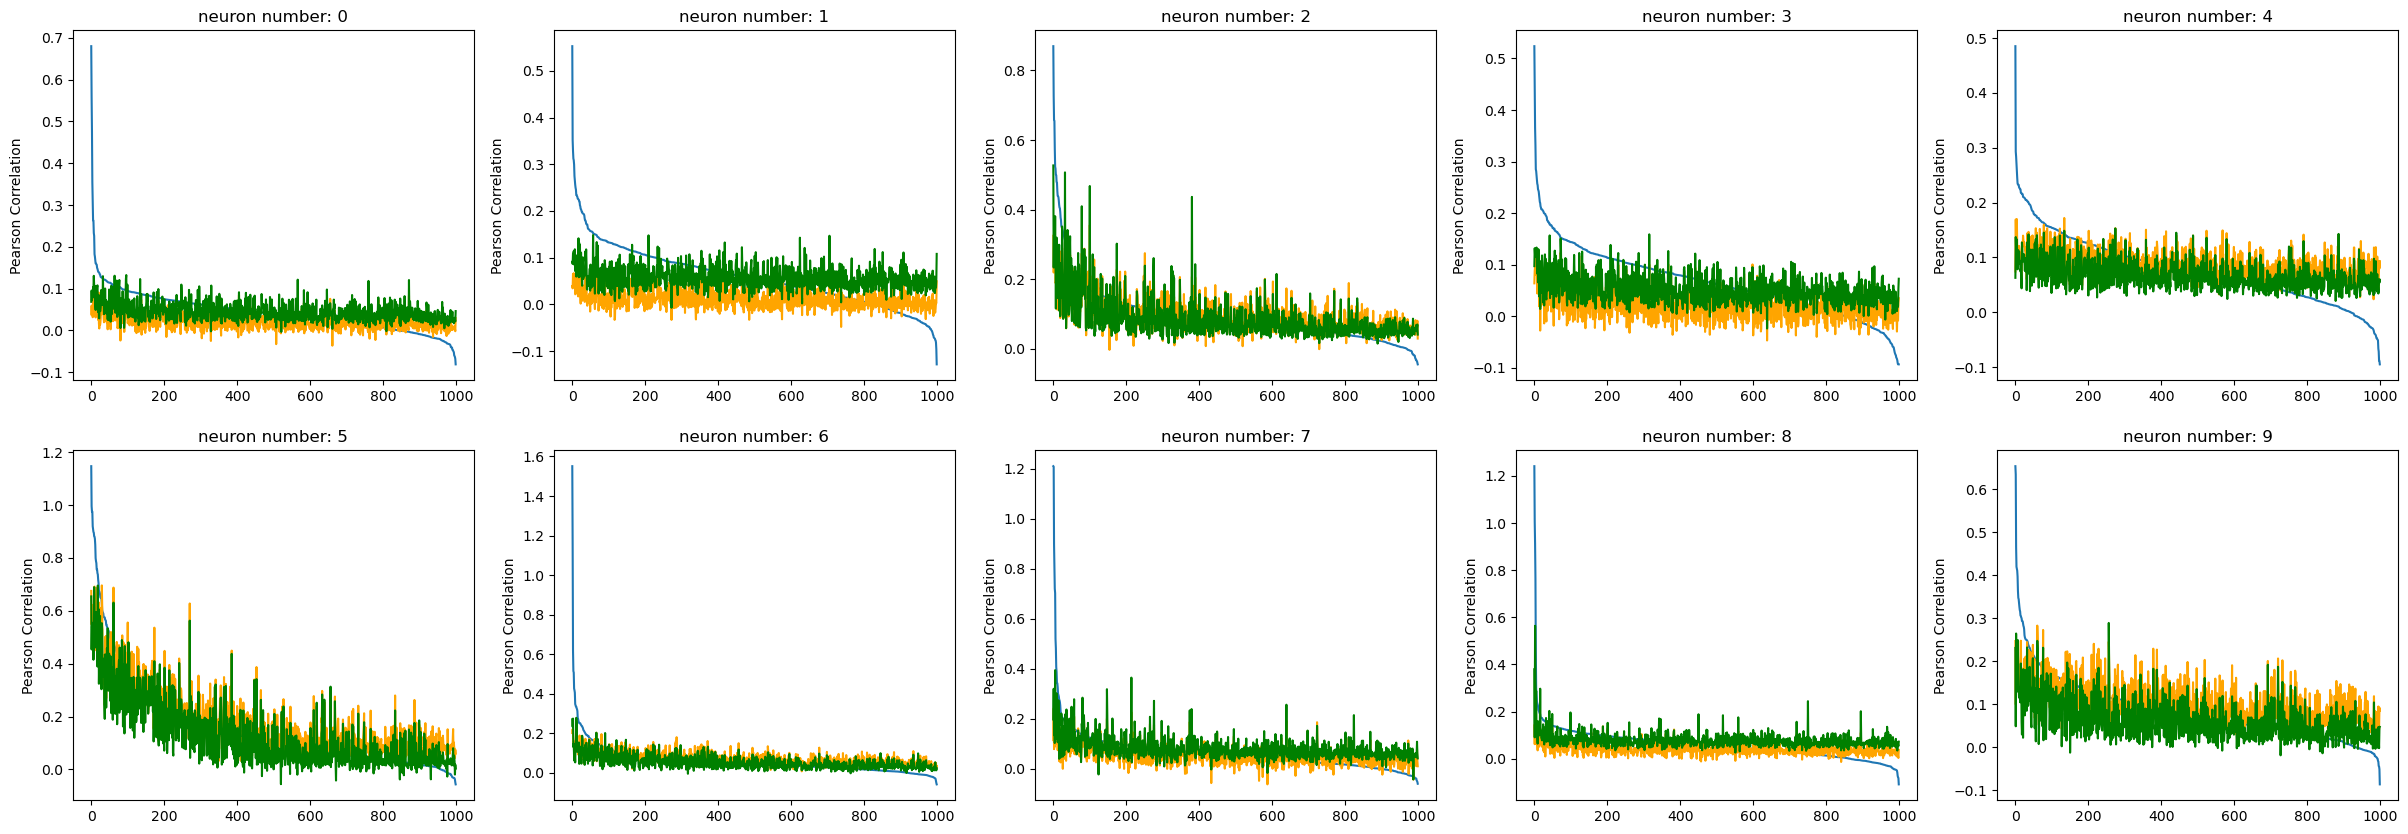

In [14]:
num_neurons = 10
net = seperate_core_model(num_neurons=num_neurons)
net.load_state_dict(torch.load("../results/scnn-1/model.pth"))
net_resp2 = torch.from_numpy(np.float32(vimg))
with torch.no_grad():
        net.eval()
        net_resp2 = net(net_resp2).detach().numpy()
net_resp2 = np.transpose(net_resp2)
net_resp_ordered2 = []
for i in range(len(net_resp2)):
    temp = []
    ord= [x[0] for x in real_resp_ordered[i]]
    for j in ord:
        temp.append(net_resp2[i][j])
    net_resp_ordered2.append(temp)
net_resp_ordered2 = np.asarray(net_resp_ordered2)

figure, axis = plt.subplots(2, 5, figsize=(30,10))

for neuron_num in range(len(real_resp_ordered)):
    axis[neuron_num//5,neuron_num%5].plot([i for i in range(len(neuron))],[x[1] for x in real_resp_ordered[neuron_num]])
    axis[neuron_num//5,neuron_num%5].plot([i for i in range(len(neuron))],[x for x in net_resp_ordered2[neuron_num]], color='orange')
    axis[neuron_num//5,neuron_num%5].plot([i for i in range(len(neuron))],[x for x in net_resp_ordered[neuron_num]],color='green')
    #axis[neuron_num//5,neuron_num%5].plot([i for i in range(len(neuron))],[x for x in net_resp_ordered2[neuron_num]], color='orange')
    axis[neuron_num//5,neuron_num%5].set_title("neuron number: " + str(neuron_num))
    axis[neuron_num//5,neuron_num%5].set_ylabel("Pearson Correlation")

plt.show()

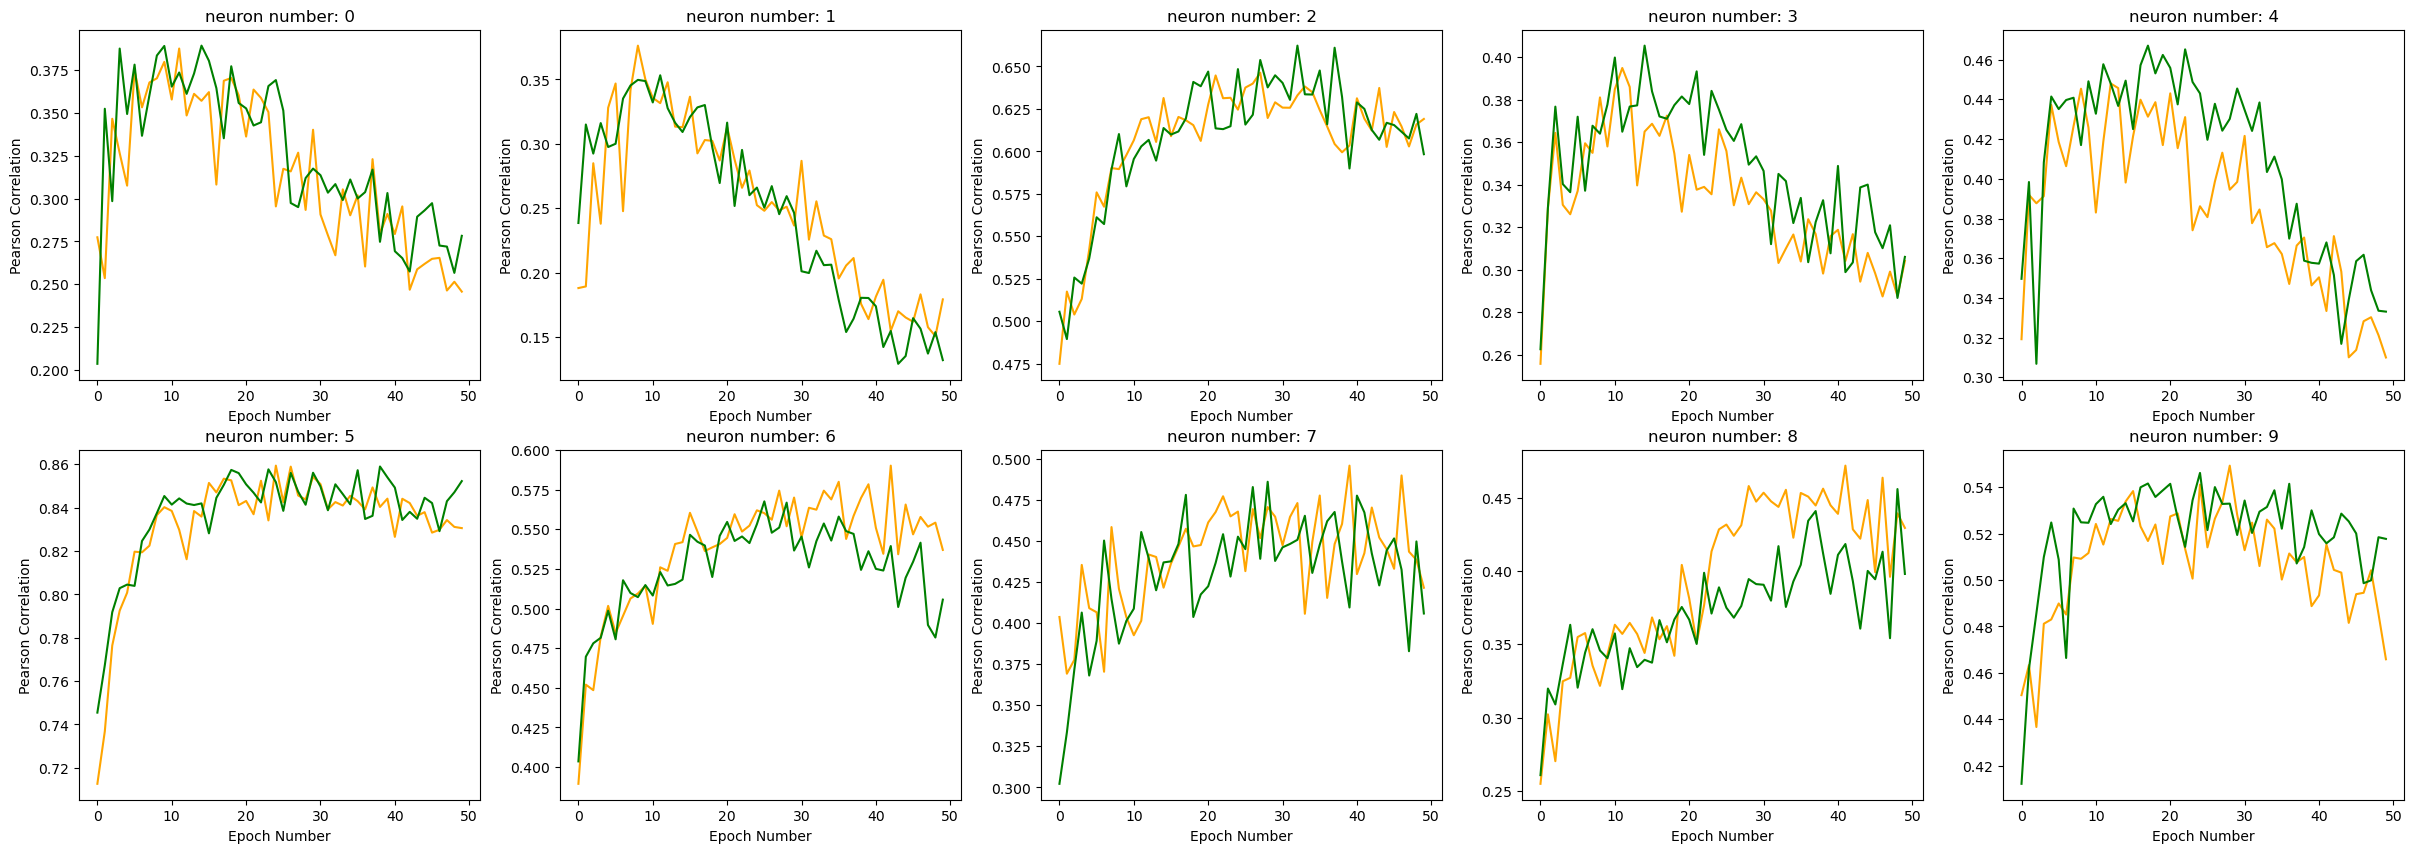

In [15]:
with open("scnn-corrs.txt", "r+") as file1:
    x2 = file1.read().split("\n")
    x2 = [a[1:-1] for a in x2 if a!='']
    x2 = [a.split(", ") for a in x2]
    for i in range(len(x2)):
        for j in range(len(x2[0])):
            x2[i][j]=float(x2[i][j])
x2 = np.array(x2)

figure, axis = plt.subplots(2, 5, figsize=(30,10))

for neuron in range(len(x[0])):
    axis[neuron//5,neuron%5].plot([i for i in range(len(x))],[a[neuron] for a in x2],color='orange')
    axis[neuron//5,neuron%5].plot([i for i in range(len(x))],[a[neuron] for a in x],color='green')
    axis[neuron//5,neuron%5].set_title("neuron number: " + str(neuron))
    axis[neuron//5,neuron%5].set_xlabel("Epoch Number")
    axis[neuron//5,neuron%5].set_ylabel("Pearson Correlation")

plt.show()


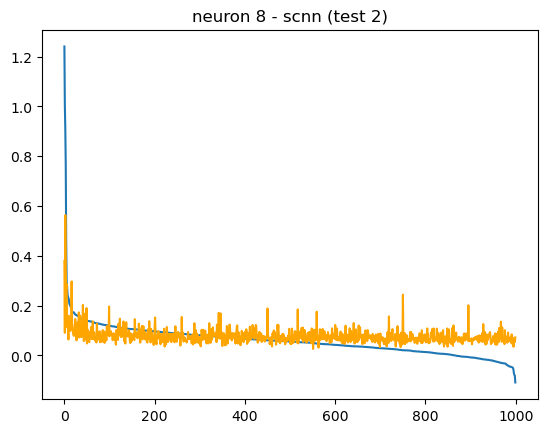

In [16]:
fig = plt.figure()
axis = fig.add_subplot(111)

for neuron_num in range(len(real_resp_ordered)):
    if neuron_num==8:
        axis.plot([i for i in range(1000)],[x[1] for x in real_resp_ordered[neuron_num]])
        axis.plot([i for i in range(1000)],[x for x in net_resp_ordered[neuron_num]], color='orange')

plt.title("neuron 8 - scnn (test 2)")
plt.show()